In [48]:
import os
import pandas as pd
from pycytominer import feature_select,aggregate
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set data input folder
# Before running notebook, download files described in README.md to this folder
input_folder = "inputs" # set input folder for the plate level profils from the HeLa DMEM screen

# Set output folder
output_folder = "outputs"
if not os.path.exists(output_folder):
    os.makedirs(output_folder, exist_ok=True)


In [3]:
# Load barcodes used in experiment
guide_df = pd.read_csv('../common_files/Barcodes.csv')
guide_list = list(guide_df['sgRNA'])
# Load the features seleceted from the pipeline
guide_profile_df = pd.read_csv('../Profile_Aggregation/outputs/20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM___ALLWELLS.csv.gz')
selected_feature_list = list(guide_profile_df.columns)
# Load the hit list from the hit-calling process
whole_cell_hits_DMEM = pd.read_csv('../3_HeLa_Screens_Summary/outputs/HeLa_DMEM_plate_level_median_per_feat_sig_genes_1_FDR_whole_cell_hits.csv').set_index('Gene')
comp_spec_hits_DMEM = pd.read_csv('../3_HeLa_Screens_Summary/outputs/HeLa_DMEM_plate_level_median_per_feat_sig_genes_1_FDR_compartment_specific_hits.csv').set_index('Gene')
DMEM_whole_cell_hit_list = list(whole_cell_hits_DMEM.index) #+ list(comp_spec_hits_DMEM.index)
DMEM_comp_hit_list = list(comp_spec_hits_DMEM.index)

## HeLa DMEM

In [9]:
# Load normalized plate_level profiles, remove ghost guides, and merge 
DMEM_plates_A = ['CP257A','CP257B']
DMEM_plates_B = ['CP257F','CP257H']

DMEM_list_A = []
for plate in DMEM_plates_A:
    filename = f'20210422_6W_CP257_guide_normalized_ALLBATCHES___{plate}___ALLWELLS.csv.gz'
    pre_DMEM_A_df = pd.read_csv(os.path.join(input_folder, filename))
    pre_DMEM_A_df = pre_DMEM_A_df[pre_DMEM_A_df["Metadata_Foci_Barcode_MatchedTo_Barcode"].isin(guide_list)]
    DMEM_list_A.append(pre_DMEM_A_df)

HeLa_DMEM_A_df = pd.concat(DMEM_list_A)

DMEM_list_B = []
for plate in DMEM_plates_B:
    filename = f'20210422_6W_CP257_guide_normalized_ALLBATCHES___{plate}___ALLWELLS.csv.gz'
    pre_DMEM_B_df = pd.read_csv(os.path.join(input_folder, filename))
    pre_DMEM_B_df = pre_DMEM_B_df[pre_DMEM_B_df["Metadata_Foci_Barcode_MatchedTo_Barcode"].isin(guide_list)]
    DMEM_list_B.append(pre_DMEM_B_df)

HeLa_DMEM_B_df = pd.concat(DMEM_list_B)

HeLa_DMEM_A_df.head()

,Metadata_Foci_Barcode_MatchedTo_GeneCode,Metadata_Foci_Barcode_MatchedTo_Barcode,Cells_AreaShape_Area,Cells_AreaShape_BoundingBoxArea,Cells_AreaShape_BoundingBoxMaximum_X,Cells_AreaShape_BoundingBoxMaximum_Y,Cells_AreaShape_BoundingBoxMinimum_X,Cells_AreaShape_BoundingBoxMinimum_Y,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,...,Nuclei_Texture_Variance_WGA_10_02_256,Nuclei_Texture_Variance_WGA_10_03_256,Nuclei_Texture_Variance_WGA_20_00_256,Nuclei_Texture_Variance_WGA_20_01_256,Nuclei_Texture_Variance_WGA_20_02_256,Nuclei_Texture_Variance_WGA_20_03_256,Nuclei_Texture_Variance_WGA_5_00_256,Nuclei_Texture_Variance_WGA_5_01_256,Nuclei_Texture_Variance_WGA_5_02_256,Nuclei_Texture_Variance_WGA_5_03_256
0,A1BG,CAAGAGAAAGACCACGAGCA,0.32588,0.10905,0.70007,1.41210,0.70469,1.42370,0.70061,1.41610,...,-0.54803,-0.492160,-0.012061,-0.008833,-0.010747,-0.009419,-0.55001,-0.58081,-0.49016,-0.45144
1,A1BG,CATCTTCTTTCACCTGAACG,0.48227,0.33605,0.95536,-1.00620,0.95497,-1.02320,0.95444,-1.01310,...,-0.47124,-0.459570,-0.012061,-0.008833,-0.010747,-0.009419,-0.47470,-0.48520,-0.47002,-0.51261
2,A1BG,CTCCGGGGAGAACTCCGGCG,1.69790,1.36360,-0.80941,-0.45070,-0.82988,-0.45505,-0.82464,-0.45294,...,0.20683,1.492900,-0.012061,-0.008833,-0.010747,-0.009419,0.40094,0.44050,0.37993,0.58439
3,A1BG,TGGAAGTCCACTCCACTCAG,-0.82202,-0.56136,-0.62212,1.47230,-0.60802,1.47670,-0.61539,1.47450,...,0.46362,0.010946,-0.012061,-0.008833,-0.010747,-0.009419,0.22893,0.23340,0.29192,0.40125
4,A1CF,AGTTATGTTAGGTATACCCG,-0.21744,-0.51254,-1.40580,0.24049,-1.41630,0.26480,-1.41100,0.25121,...,-0.66180,-0.607740,-0.012061,-0.008833,-0.010747,-0.009419,-0.74968,-0.78268,-0.76258,-0.74534


In [13]:
# Perform feature selection on merged profiles followed by median aggregation
HeLa_DMEM_A_feature_selected_df = HeLa_DMEM_A_df[selected_feature_list]
HeLa_DMEM_B_feature_selected_df = HeLa_DMEM_B_df[selected_feature_list]

HeLa_DMEM_A_feature_selected_median_df= aggregate(
                    population_df=HeLa_DMEM_A_feature_selected_df, 
                    strata=['Metadata_Foci_Barcode_MatchedTo_GeneCode' ,'Metadata_Foci_Barcode_MatchedTo_Barcode'], 
                    features='infer', 
                    operation='median' 
                    )

HeLa_DMEM_B_feature_selected_median_df= aggregate(
                    population_df=HeLa_DMEM_B_feature_selected_df, 
                    strata=['Metadata_Foci_Barcode_MatchedTo_GeneCode' ,'Metadata_Foci_Barcode_MatchedTo_Barcode'], 
                    features='infer', 
                    operation='median' 
                    )

HeLa_DMEM_A_feature_selected_median_df

,Metadata_Foci_Barcode_MatchedTo_GeneCode,Metadata_Foci_Barcode_MatchedTo_Barcode,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,...,Nuclei_Texture_SumVariance_DAPI_Painting_10_02_256,Nuclei_Texture_SumVariance_DAPI_Painting_10_03_256,Nuclei_Texture_SumVariance_Mito_10_03_256,Nuclei_Texture_SumVariance_Mito_5_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_03_256,Nuclei_Texture_SumVariance_Phalloidin_5_01_256,Nuclei_Texture_SumVariance_WGA_10_01_256,Nuclei_Texture_SumVariance_WGA_10_03_256,Nuclei_Texture_SumVariance_WGA_5_01_256
0,A1BG,CAAGAGAAAGACCACGAGCA,-0.000992,-0.020662,-0.020601,0.001436,0.002216,-0.090910,0.085665,0.022060,...,-0.477245,-0.446035,0.073906,0.132356,-0.189760,-0.169380,-0.176070,-0.110360,-0.331005,0.174140
1,A1BG,CATCTTCTTTCACCTGAACG,0.017415,0.109884,0.022049,-0.010596,0.000619,0.222845,0.563685,0.007692,...,0.199696,0.182235,-0.204145,0.045752,-0.005410,0.139588,0.045881,-0.282070,-0.446215,-0.586520
2,A1BG,CTCCGGGGAGAACTCCGGCG,-0.041301,-0.405900,-0.214335,-1.330330,-0.173520,1.962560,1.139910,-1.347150,...,0.035400,-0.250200,-0.519020,-0.210947,-0.141066,-0.334055,-0.138813,-0.477550,0.378500,-0.287825
3,A1BG,TGGAAGTCCACTCCACTCAG,0.001183,0.008023,-0.030977,0.026404,0.001118,0.822575,0.069385,0.124391,...,-0.330670,-0.327305,-0.378755,-0.277308,-0.090540,0.003700,-0.129669,-0.026910,-0.063805,-0.258866
4,A1CF,AGTTATGTTAGGTATACCCG,0.000425,0.127640,-0.014017,0.005638,0.000548,-0.300115,0.794955,-0.081631,...,-0.541970,-0.506700,-0.178399,-0.196615,0.028582,-0.070875,-0.040795,-0.466135,-0.231865,-0.500975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80681,nontargeting,TTTATGCATTTAATACGCCG,-0.000497,0.017058,-0.003407,-0.000677,0.000255,-0.147165,0.047061,0.042085,...,-0.239980,-0.237135,-0.171585,-0.117613,-0.132605,-0.161275,-0.123155,-0.202925,-0.219660,-0.148364
80682,nontargeting,TTTCTAGTTACTACTGGACG,-0.000635,0.050962,-0.007194,-0.000482,0.000251,-0.084714,0.162823,0.051862,...,-0.221930,-0.252645,-0.102242,-0.078669,-0.123510,-0.151725,-0.110706,-0.188325,-0.166535,-0.129534
80683,nontargeting,TTTGGCAGTACCTTTTATTA,-0.001614,0.008018,-0.002954,-0.002209,0.000236,-0.135530,0.017262,0.095096,...,-0.262345,-0.278210,-0.149475,-0.121276,-0.150860,-0.158695,-0.127755,-0.230195,-0.245700,-0.203860
80684,nontargeting,TTTTACCTTGTTCACATGGA,-0.002535,0.017229,-0.002878,0.001984,0.000392,-0.101951,0.092669,0.006199,...,-0.176710,-0.214960,-0.173990,-0.097528,-0.111130,-0.131920,-0.119795,-0.354225,-0.301060,-0.300125


In [15]:
# Set aggregation parameters for gene level aggregation
aggregate_columns = ['Metadata_Foci_Barcode_MatchedTo_GeneCode']
aggregate_features = 'infer'
aggregate_operation = 'median'

HeLa_DMEM_A_gene_df = aggregate(
            population_df=HeLa_DMEM_A_feature_selected_median_df,
            strata=aggregate_columns,
            features=aggregate_features,
            operation=aggregate_operation,
            )

HeLa_DMEM_B_gene_df = aggregate(
            population_df=HeLa_DMEM_B_feature_selected_median_df,
            strata=aggregate_columns,
            features=aggregate_features,
            operation=aggregate_operation,
            )

HeLa_DMEM_A_gene_df

,Metadata_Foci_Barcode_MatchedTo_GeneCode,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,...,Nuclei_Texture_SumVariance_DAPI_Painting_10_02_256,Nuclei_Texture_SumVariance_DAPI_Painting_10_03_256,Nuclei_Texture_SumVariance_Mito_10_03_256,Nuclei_Texture_SumVariance_Mito_5_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_03_256,Nuclei_Texture_SumVariance_Phalloidin_5_01_256,Nuclei_Texture_SumVariance_WGA_10_01_256,Nuclei_Texture_SumVariance_WGA_10_03_256,Nuclei_Texture_SumVariance_WGA_5_01_256
0,A1BG,0.000096,-0.006319,-0.025789,-0.004580,0.000868,0.522710,0.324675,0.014876,-0.695565,...,-0.147635,-0.288752,-0.291450,-0.082598,-0.115803,-0.082840,-0.134241,-0.196215,-0.197405,-0.273346
1,A1CF,-0.000560,0.041122,-0.009239,-0.006728,-0.000194,0.025092,0.567705,0.002632,-0.139927,...,-0.091855,-0.050027,-0.162982,-0.094320,0.032231,-0.103266,-0.037254,0.002853,-0.026702,0.035181
2,A2M,-0.001319,0.090677,0.009560,0.020762,0.000950,0.061573,-0.376100,0.278268,-0.060610,...,0.183785,0.103958,0.419473,0.193226,-0.138551,-0.172716,-0.167897,-0.196866,-0.104540,-0.063634
3,A2ML1,-0.007557,0.016356,-0.006628,0.011578,0.000968,-0.097228,0.463666,-0.128623,0.033370,...,-0.285485,-0.264519,-0.346975,-0.254182,-0.113702,-0.106058,-0.111035,-0.277587,-0.284707,-0.214062
4,A3GALT2,0.001903,-0.233862,0.008155,0.028518,0.005975,0.292835,0.363966,-0.377598,-0.280328,...,-0.371450,-0.425937,-0.325466,-0.214145,-0.248417,-0.278351,-0.263005,-0.480548,-0.558758,-0.379868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20388,ZYG11B,-0.008428,-0.015852,0.002505,-0.015256,0.000264,0.088013,0.122416,-0.324199,-0.236245,...,-0.034747,-0.136171,-0.136643,-0.127219,-0.084872,-0.213248,-0.126941,-0.197072,-0.314364,-0.283685
20389,ZYX,-0.000322,0.090458,0.032502,-0.006688,-0.000214,-0.170238,0.156633,-0.231082,0.097477,...,-0.112648,-0.201684,-0.100531,-0.010185,-0.018893,-0.006844,-0.055923,0.191011,-0.230995,0.109624
20390,ZZEF1,-0.002046,-0.184995,-0.008361,-0.017633,0.001330,-0.066675,0.138988,-0.057303,0.023530,...,-0.430515,-0.360193,-0.261982,-0.149186,-0.188043,-0.207967,-0.131728,-0.246383,-0.398712,-0.308762
20391,ZZZ3,-0.012701,0.037603,0.013157,0.029956,0.001806,-0.230141,-0.563653,0.335420,0.158333,...,-0.056999,-0.060855,-0.017872,-0.081554,-0.131608,0.105060,-0.089752,-0.331492,-0.108738,-0.278485


In [ ]:
#HeLa_DMEM_A_gene_df.to_csv(os.path.join(output_folder,'20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM_A___ALLWELLS_gene_aggregated.csv.gz'),index = False)
#HeLa_DMEM_B_gene_df.to_csv(os.path.join(output_folder,'20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM_B___ALLWELLS_gene_aggregated.csv.gz'),index = False)
#HeLa_DMEM_A_gene_df = pd.read_csv(os.path.join(output_folder,'20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM_A___ALLWELLS_gene_aggregated.csv.gz'))
#HeLa_DMEM_B_gene_df = pd.read_csv(os.path.join(output_folder,'20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___DMEM_B___ALLWELLS_gene_aggregated.csv.gz'))


In [25]:
A_gene_list = list(HeLa_DMEM_A_gene_df.Metadata_Foci_Barcode_MatchedTo_GeneCode)
B_gene_list = list(HeLa_DMEM_B_gene_df.Metadata_Foci_Barcode_MatchedTo_GeneCode)
DMEM_A_gene_df = HeLa_DMEM_A_gene_df.query("Metadata_Foci_Barcode_MatchedTo_GeneCode != 'LOC102724862'").set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
DMEM_B_gene_df = HeLa_DMEM_B_gene_df.set_index('Metadata_Foci_Barcode_MatchedTo_GeneCode')
DMEM_B_gene_df

,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_HuMoment_1,...,Nuclei_Texture_SumVariance_DAPI_Painting_10_02_256,Nuclei_Texture_SumVariance_DAPI_Painting_10_03_256,Nuclei_Texture_SumVariance_Mito_10_03_256,Nuclei_Texture_SumVariance_Mito_5_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_03_256,Nuclei_Texture_SumVariance_Phalloidin_5_01_256,Nuclei_Texture_SumVariance_WGA_10_01_256,Nuclei_Texture_SumVariance_WGA_10_03_256,Nuclei_Texture_SumVariance_WGA_5_01_256
Metadata_Foci_Barcode_MatchedTo_GeneCode,,,,,,,,,,,,,,,,,,,,,
A1BG,0.005843,0.104595,-0.015142,0.025415,-0.001183,0.000110,-0.261380,0.186133,-0.064362,-0.287895,...,-0.219339,-0.313683,0.016728,-0.015446,-0.034550,-0.141390,-0.089397,-0.246690,-0.119017,-0.207535
A1CF,-0.002324,0.173212,-0.002604,-0.000402,0.001259,-0.128433,-0.129139,0.189110,0.053450,-0.256625,...,-0.060388,-0.109338,-0.041329,-0.032906,-0.052178,-0.038183,-0.072912,-0.203804,-0.069538,-0.193671
A2M,-0.028403,0.048400,0.041244,-0.010817,-0.004250,0.010065,-0.033640,-0.176665,-0.105370,-0.101655,...,0.034610,-0.075032,-0.075911,-0.065129,-0.075329,0.025674,-0.046613,-0.316236,-0.276367,-0.270867
A2ML1,0.000429,0.152759,-0.020189,-0.000412,0.001257,0.109090,-0.263050,0.353277,-0.191570,-0.273602,...,-0.032371,-0.024565,-0.101329,-0.025122,-0.146825,-0.124152,-0.113761,-0.056488,-0.137045,-0.016527
A3GALT2,-0.000653,-0.130209,-0.037025,0.005268,0.002776,-0.010217,0.559967,-0.290050,-0.050500,0.319267,...,-0.639430,-0.507785,-0.040931,-0.031409,-0.049323,-0.053602,-0.080560,-0.282754,-0.406675,-0.426370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,-0.019610,0.007309,0.012317,0.025369,-0.000145,0.225773,-0.112845,-0.502810,-0.360304,-0.222060,...,-0.260501,-0.292180,-0.082014,-0.040439,-0.102410,-0.126503,-0.068401,0.312582,0.178025,0.071629
ZYX,0.034872,-0.008583,-0.062672,0.072332,0.000454,0.183399,0.171736,-0.120020,-0.309978,-0.018068,...,0.095095,-0.050916,0.095210,0.028747,-0.058346,-0.048221,-0.075160,0.207375,-0.126032,0.225395
ZZEF1,0.040306,0.028314,-0.017663,-0.032273,-0.000073,-0.340085,-0.221560,0.227462,0.314584,0.017275,...,0.176391,0.312640,-0.082765,-0.045628,0.021932,0.033220,0.068008,-0.299453,-0.409077,-0.477662


In [46]:
whole_cell_hits_DMEM = pd.read_csv('../3_HeLa_Screens_Summary/outputs/HeLa_DMEM_plate_level_median_per_feat_sig_genes_1_FDR_whole_cell_hits.csv').set_index('Gene')
comp_spec_hits_DMEM = pd.read_csv('../3_HeLa_Screens_Summary/outputs/HeLa_DMEM_plate_level_median_per_feat_sig_genes_1_FDR_compartment_specific_hits.csv').set_index('Gene')
DMEM_whole_cell_hit_list = list(whole_cell_hits_DMEM.index) #+ list(comp_spec_hits_DMEM.index)
DMEM_comp_hit_list = list(comp_spec_hits_DMEM.index)
len(DMEM_whole_cell_hit_list)

1039

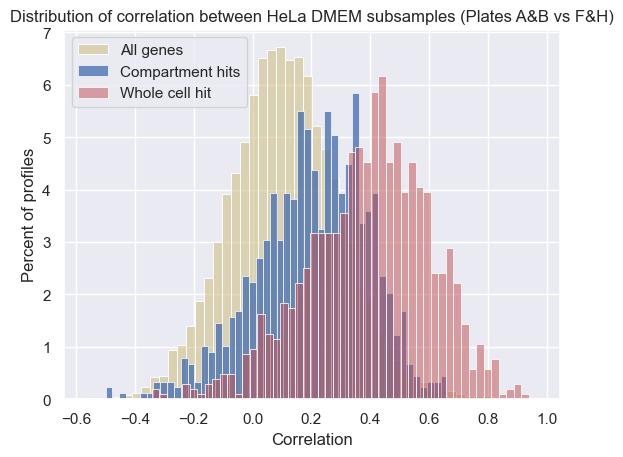

In [92]:
DMEM_A_B_corr_df = DMEM_A_gene_df.corrwith(DMEM_B_gene_df, axis = 1) 
DMEM_A_B_whole_cell_hits_corr_df = DMEM_A_B_corr_df.loc[DMEM_whole_cell_hit_list]
DMEM_A_B_comp_hits_corr_df = DMEM_A_B_corr_df.loc[DMEM_comp_hit_list]

sns.set_theme()

fig, ax = plt.subplots()

sns.histplot(DMEM_A_B_corr_df ,color='y' ,bins= 50,stat='percent', kde=False , alpha=0.5,ax = ax);
sns.histplot(DMEM_A_B_comp_hits_corr_df ,color='b' ,bins= 50,stat='percent', kde=False, alpha=0.8,ax = ax);
sns.histplot(DMEM_A_B_whole_cell_hits_corr_df ,color='r' ,bins= 50,stat='percent', kde=False, alpha=0.5,ax = ax);

ax.set_title(f'Distribution of correlation between HeLa DMEM subsamples (Plates A&B vs F&H)')
ax.set_ylabel('Percent of profiles')
ax.set_xlabel('Correlation')

ax.legend(['All genes','Compartment hits','Whole cell hit'])

fig.savefig(os.path.join(output_folder,'HeLa_DMEM_subsamples_gene_correlation_distribution.png'),
            dpi=300,
            facecolor='w',
            edgecolor='w')
plt.show()
